In [1]:
# How to validate ongoing learning?

# Here implemented method:
# - load current model
# - simulate a number of games with random moves initially to get random positions
# - played out deterministically based on current model
# - calculate mean difference between model values and what would be the MC-reward (discounted -1 / 1)
# - keep track of these errors for either only decisive games or all games

In [2]:
import numpy as np
import time
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, random_split
import torch.optim as optim
import matplotlib.pyplot as plt
import sys, os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(project_root)

from Resources.Model import Model_v8
from Resources.Game import *


In [4]:
model = Model_v8()
model_saves = os.listdir('../Monte Carlo/Model Saves MC v8 Parallel')
if len(model_saves) > 0:
    newest_model = max(int(i[6:-8]) for i in model_saves)
    latest_batch_index = newest_model
    model.load_state_dict(torch.load('../Monte Carlo/Model Saves MC v8 Parallel/model_{}_batches'.format(newest_model)))
criterion = nn.MSELoss()

n_games         = 1500 # number of games per model load
n_random_moves  = 5 # number of random moves per player in the beginning
use_draws       = False
gamma           = 0.98 

draws = 0
white_wins = 0
black_wins = 0

In [6]:
val_mean_list = []
val_median_list = []
val_std_list = []

curr_ind = 0

validation_error_list = []
hist_active_1 = []
hist_active_20 = []
hist_active_50 = []
hist_active_100 = []
hist_active_150 = []


validation error for model_batch 10: 0.40061166882514954
validation error for model_batch 20: 0.44426801800727844
validation error for model_batch 30: 0.44012415409088135
validation error for model_batch 40: 0.44718512892723083
validation error for model_batch 50: 0.4282729923725128
validation error for model_batch 60: 0.3691655099391937
validation error for model_batch 70: 0.3940277099609375
validation error for model_batch 80: 0.3820919096469879
validation error for model_batch 90: 0.4079911410808563
validation error for model_batch 100: 0.36025288701057434


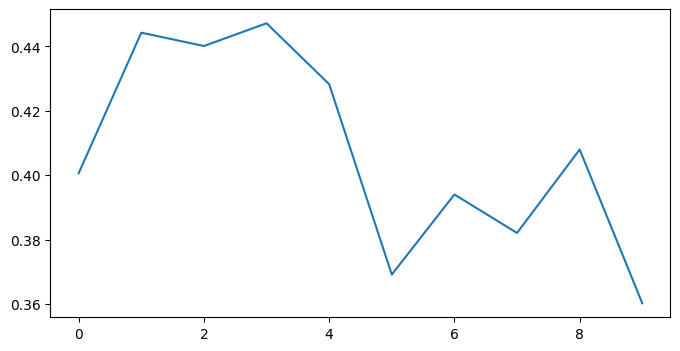

validation error for model_batch 110: 0.3816947638988495
validation error for model_batch 120: 0.3662719130516052
validation error for model_batch 130: 0.39134976267814636
validation error for model_batch 140: 0.35942888259887695
validation error for model_batch 150: 0.31597861647605896
validation error for model_batch 160: 0.37914007902145386
validation error for model_batch 170: 0.33898913860321045
validation error for model_batch 180: 0.3712032735347748
validation error for model_batch 190: 0.35544025897979736
validation error for model_batch 200: 0.32879847288131714


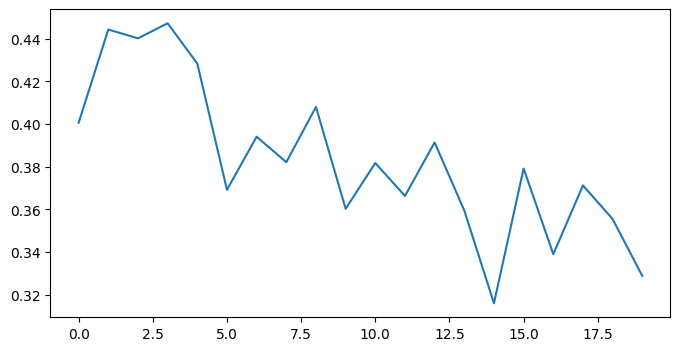

validation error for model_batch 210: 0.3507075607776642
validation error for model_batch 220: 0.3654681444168091
validation error for model_batch 230: 0.30587708950042725
validation error for model_batch 240: 0.34892764687538147
validation error for model_batch 250: 0.3451346457004547
validation error for model_batch 260: 0.3246874213218689
validation error for model_batch 270: 0.36050790548324585
validation error for model_batch 280: 0.36554524302482605
validation error for model_batch 290: 0.33342432975769043
validation error for model_batch 300: 0.3236740231513977


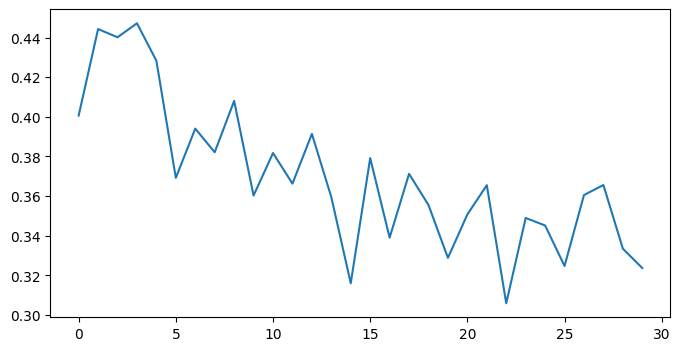

validation error for model_batch 310: 0.30776870250701904
validation error for model_batch 320: 0.30246397852897644
validation error for model_batch 330: 0.3298046290874481
validation error for model_batch 340: 0.32768934965133667
validation error for model_batch 350: 0.33419355750083923
validation error for model_batch 360: 0.3594221770763397
validation error for model_batch 370: 0.33160117268562317
validation error for model_batch 380: 0.3415813446044922
validation error for model_batch 390: 0.335300475358963
validation error for model_batch 400: 0.36272671818733215


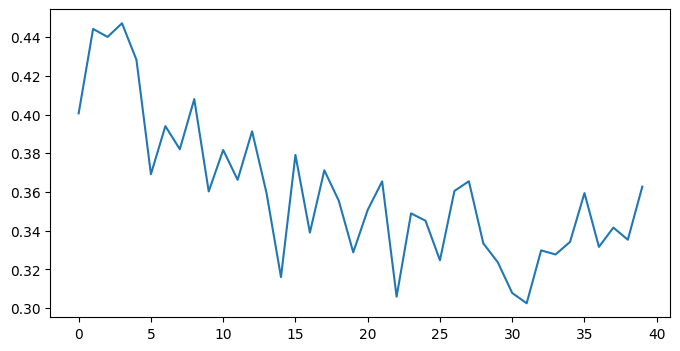

validation error for model_batch 410: 0.3459886312484741
validation error for model_batch 420: 0.31769171357154846
validation error for model_batch 430: 0.3797353208065033
validation error for model_batch 440: 0.3402971625328064
validation error for model_batch 450: 0.34339460730552673
validation error for model_batch 460: 0.33513352274894714
validation error for model_batch 470: 0.29721468687057495
validation error for model_batch 480: 0.31631067395210266
validation error for model_batch 490: 0.2894873321056366
validation error for model_batch 500: 0.2762003540992737


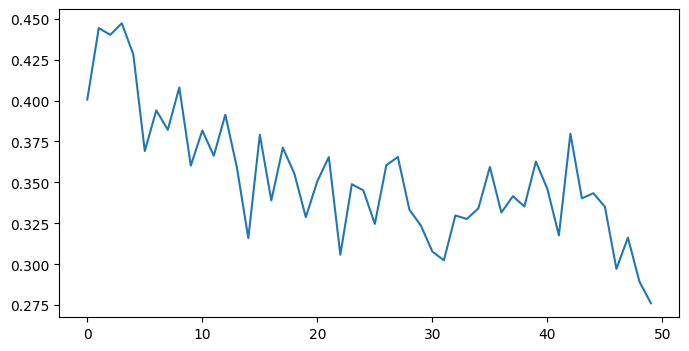

validation error for model_batch 510: 0.3391006290912628
validation error for model_batch 520: 0.33087971806526184
validation error for model_batch 530: 0.3416166305541992
validation error for model_batch 540: 0.3160105049610138
validation error for model_batch 550: 0.28498488664627075
validation error for model_batch 560: 0.3419543504714966
validation error for model_batch 570: 0.33087876439094543
validation error for model_batch 580: 0.3115957975387573
validation error for model_batch 590: 0.3396016061306
validation error for model_batch 600: 0.3168594539165497


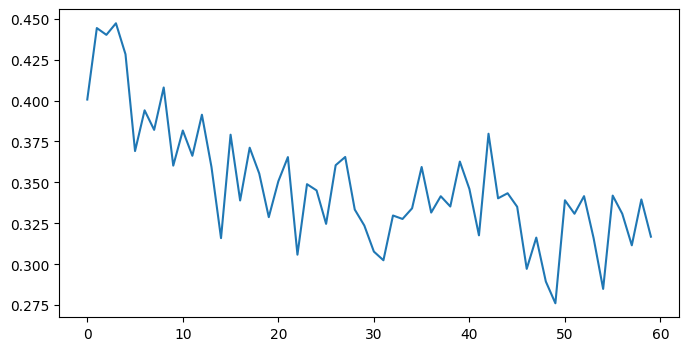

validation error for model_batch 610: 0.31807711720466614
validation error for model_batch 620: 0.3188253343105316
validation error for model_batch 630: 0.31319522857666016
validation error for model_batch 640: 0.3228694200515747
validation error for model_batch 650: 0.33436688780784607
validation error for model_batch 660: 0.3037663400173187
validation error for model_batch 670: 0.291079044342041
validation error for model_batch 680: 0.33543115854263306
validation error for model_batch 690: 0.32980114221572876
validation error for model_batch 700: 0.32214295864105225


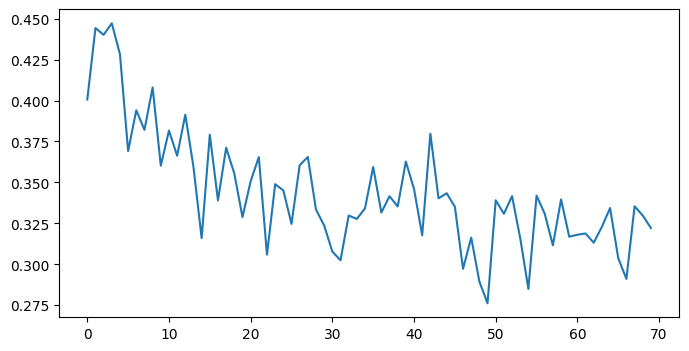

validation error for model_batch 710: 0.32442736625671387
validation error for model_batch 720: 0.3313729763031006
validation error for model_batch 730: 0.3033950924873352
validation error for model_batch 740: 0.3140541911125183
validation error for model_batch 750: 0.33789387345314026
validation error for model_batch 760: 0.32350271940231323
validation error for model_batch 770: 0.34232431650161743
validation error for model_batch 780: 0.3294796347618103
validation error for model_batch 790: 0.2977775037288666
validation error for model_batch 800: 0.3140660524368286


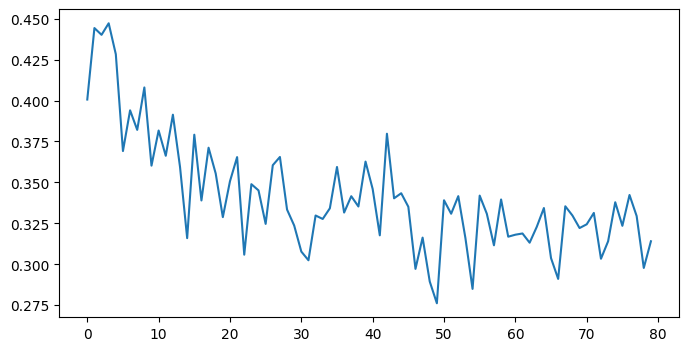

validation error for model_batch 810: 0.3204668164253235
validation error for model_batch 820: 0.3367404341697693
validation error for model_batch 830: 0.33429253101348877
validation error for model_batch 840: 0.33089637756347656
validation error for model_batch 850: 0.3059772551059723
validation error for model_batch 860: 0.31427136063575745
validation error for model_batch 870: 0.308278352022171
validation error for model_batch 880: 0.3369697630405426
validation error for model_batch 890: 0.30682477355003357
validation error for model_batch 900: 0.30248716473579407


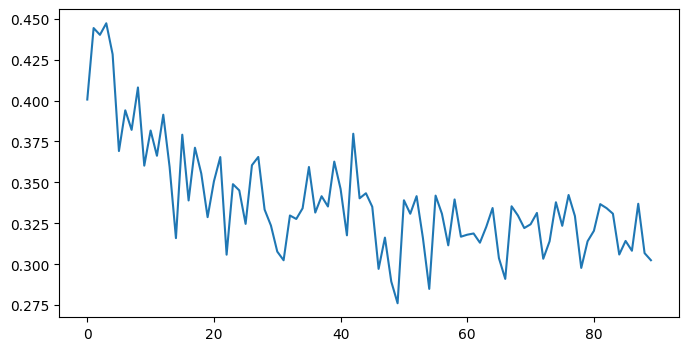

validation error for model_batch 910: 0.30900275707244873
validation error for model_batch 920: 0.328693687915802
validation error for model_batch 930: 0.321102112531662
validation error for model_batch 940: 0.3235679268836975
validation error for model_batch 950: 0.27969688177108765
validation error for model_batch 960: 0.30484703183174133
validation error for model_batch 970: 0.2898361086845398
validation error for model_batch 980: 0.3078345060348511
validation error for model_batch 990: 0.3270135521888733
validation error for model_batch 1000: 0.38524171710014343


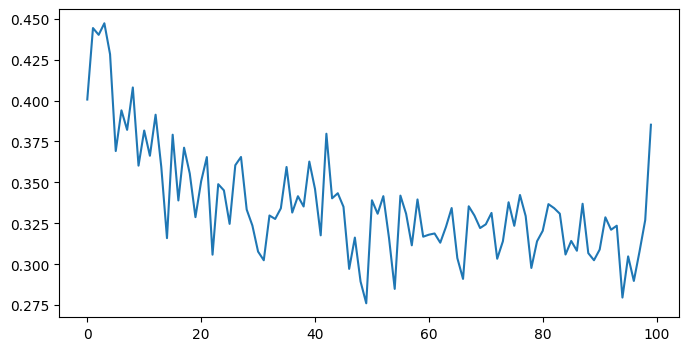

validation error for model_batch 1010: 0.2966119945049286
validation error for model_batch 1020: 0.3320923149585724
validation error for model_batch 1030: 0.31278878450393677
validation error for model_batch 1040: 0.3331999182701111
validation error for model_batch 1050: 0.32230326533317566
validation error for model_batch 1060: 0.28939637541770935
validation error for model_batch 1070: 0.2795380651950836
validation error for model_batch 1080: 0.2890767455101013
validation error for model_batch 1090: 0.33565250039100647
validation error for model_batch 1100: 0.3540615439414978


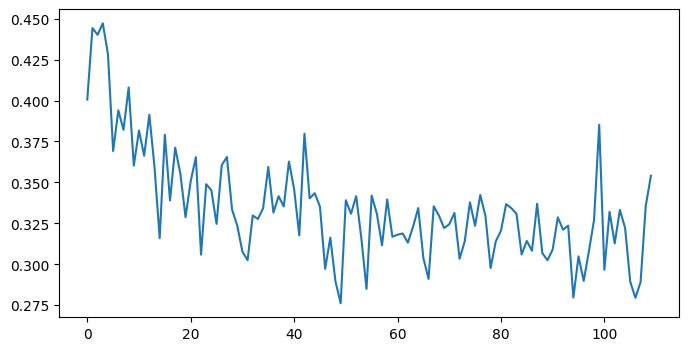

validation error for model_batch 1110: 0.32379716634750366
validation error for model_batch 1120: 0.33424827456474304
validation error for model_batch 1130: 0.3091258406639099
validation error for model_batch 1140: 0.31640490889549255
validation error for model_batch 1150: 0.30976375937461853
validation error for model_batch 1160: 0.3429510295391083
validation error for model_batch 1170: 0.3063754439353943
validation error for model_batch 1180: 0.33457207679748535
validation error for model_batch 1190: 0.3117509186267853
validation error for model_batch 1200: 0.3225330710411072


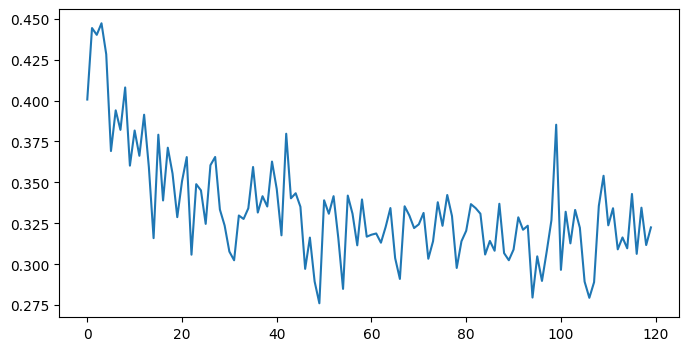

validation error for model_batch 1210: 0.3045501708984375
validation error for model_batch 1220: 0.32085272669792175
validation error for model_batch 1230: 0.3057214319705963
validation error for model_batch 1240: 0.30975839495658875
validation error for model_batch 1250: 0.3107544183731079
validation error for model_batch 1260: 0.3677099049091339
validation error for model_batch 1270: 0.3412056267261505
validation error for model_batch 1280: 0.3056311011314392
validation error for model_batch 1290: 0.30460143089294434
validation error for model_batch 1300: 0.3404991924762726


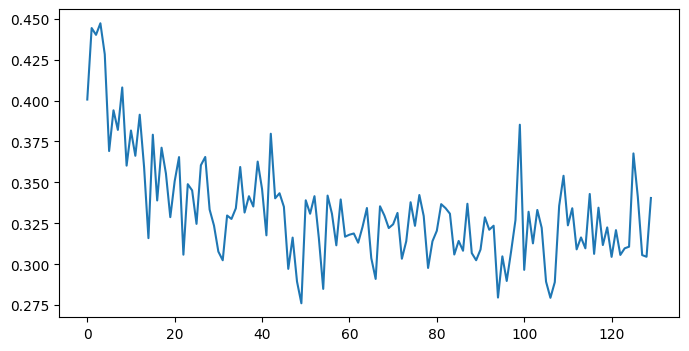

validation error for model_batch 1310: 0.32708027958869934
validation error for model_batch 1320: 0.3036843538284302
validation error for model_batch 1330: 0.30935874581336975
validation error for model_batch 1340: 0.3067963123321533
validation error for model_batch 1350: 0.30222368240356445
validation error for model_batch 1360: 0.3199840784072876
validation error for model_batch 1370: 0.3278043866157532
validation error for model_batch 1380: 0.36035245656967163
validation error for model_batch 1390: 0.3660382330417633
validation error for model_batch 1400: 0.3211551904678345


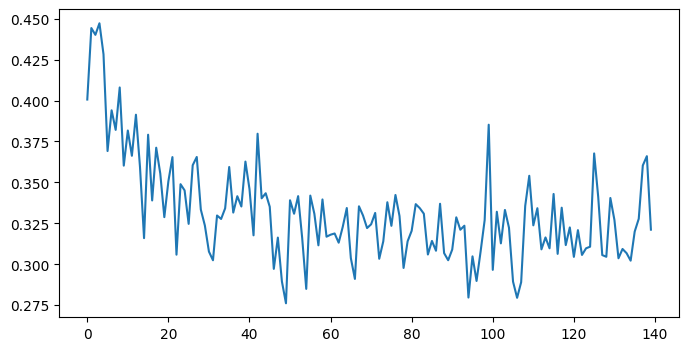

validation error for model_batch 1410: 0.3281267285346985
validation error for model_batch 1420: 0.3024871349334717
validation error for model_batch 1430: 0.3116626441478729
validation error for model_batch 1440: 0.3077089488506317
validation error for model_batch 1450: 0.3267515301704407
validation error for model_batch 1460: 0.32391878962516785
validation error for model_batch 1470: 0.32492008805274963
validation error for model_batch 1480: 0.3274935781955719
validation error for model_batch 1490: 0.3313164710998535
validation error for model_batch 1500: 0.3412422239780426


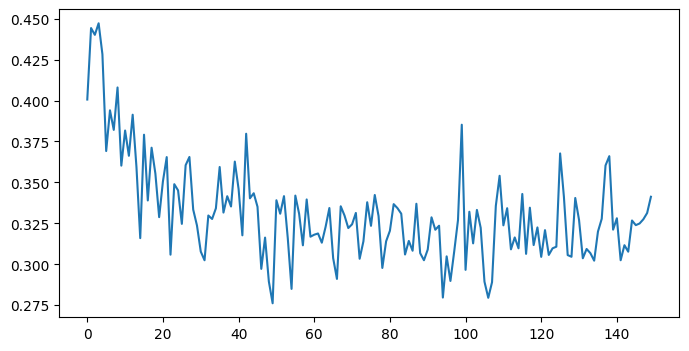

validation error for model_batch 1510: 0.3434823751449585
validation error for model_batch 1520: 0.30737993121147156
validation error for model_batch 1530: 0.2993869185447693
validation error for model_batch 1540: 0.3109874427318573
validation error for model_batch 1550: 0.3284705579280853
validation error for model_batch 1560: 0.29811856150627136
validation error for model_batch 1570: 0.3037121593952179
validation error for model_batch 1580: 0.3164650797843933
validation error for model_batch 1590: 0.29202958941459656
validation error for model_batch 1600: 0.3420753479003906


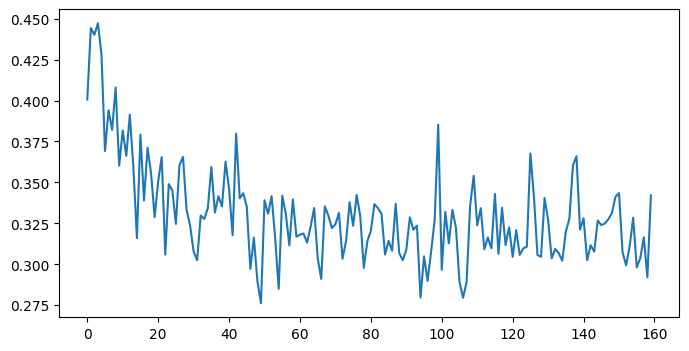

validation error for model_batch 1610: 0.2911141514778137
validation error for model_batch 1620: 0.30007949471473694
validation error for model_batch 1630: 0.31949999928474426
validation error for model_batch 1640: 0.32422715425491333
validation error for model_batch 1650: 0.33234333992004395
validation error for model_batch 1660: 0.31218329071998596
validation error for model_batch 1670: 0.32423773407936096
validation error for model_batch 1680: 0.3388386070728302
validation error for model_batch 1690: 0.3165883421897888
validation error for model_batch 1700: 0.34395742416381836


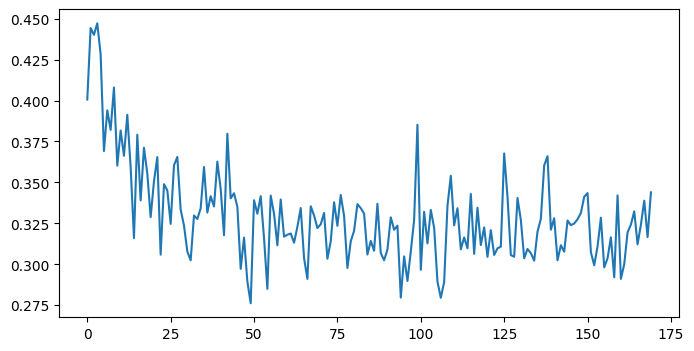

validation error for model_batch 1710: 0.32309919595718384
validation error for model_batch 1720: 0.34334269165992737
validation error for model_batch 1730: 0.32158204913139343
validation error for model_batch 1740: 0.30809342861175537
validation error for model_batch 1750: 0.3220779299736023
validation error for model_batch 1760: 0.3351342976093292
validation error for model_batch 1770: 0.34424692392349243
validation error for model_batch 1780: 0.33101707696914673


KeyboardInterrupt: 

In [7]:
while True:

    # wait for new model
    while True:
        try:
            model_saves = os.listdir('../Monte Carlo/Model Saves MC v8 Parallel')
            model_inds = [int(i[6:-8]) for i in model_saves]
            model_inds.sort()
        except:
            time.sleep(0.05)
            continue
        next_ind = curr_ind
        for ind in model_inds:
            if ind > curr_ind and ind % 10 == 0:
                next_ind = ind
                break
        if next_ind > curr_ind:
            break
        else:
            time.sleep(0.05)

    curr_ind = next_ind

    model = Model_v8()
    model.load_state_dict(torch.load('../Monte Carlo/Model Saves MC v8 Parallel/model_{}_batches'.format(curr_ind)))

    # validation_error_list = []

    meta_games = []
    meta_boards_white = []; meta_boards_black = []
    i = 0

    meta_active = []

    for game_ind in range(n_games):
        meta_games.append( Game() )
        meta_boards_white.append([]); meta_boards_black.append([])
        meta_active.append(True)

    model.eval()

    while True in meta_active:

        i += 1
        full_board_batch = []
        meta_board_batch_sizes = [] # save batch sizes to split model output afterwards
        meta_moves = []

        # go through games, collect positions for value evaluations
        for g, game in enumerate(meta_games):

            if not meta_active[g]:
                meta_board_batch_sizes.append(0)
                meta_moves.append([])
                continue

            meta_moves.append(game.PossibleMoves())
            game_ini = game.copy()
            board_batch = []
            mate = False

            for move in meta_moves[-1]:
                game.PlayMove(move)
                board_batch.append(board_to_tensor(game.pieces))
                game.FlipBoard()
                if game.is_over():
                    mate = True
                    break
                game = game_ini.copy()

            meta_games[g] = game.copy()

            if mate:
                meta_active[g] = False
                meta_board_batch_sizes.append(0)
                game.FlipBoard()
                if i % 2 == 1:
                    meta_boards_white[g].append(board_to_bool_tensor(game.pieces))
                if i % 2 == 0:
                    meta_boards_black[g].append(board_to_bool_tensor(game.pieces))

            if not mate:
                full_board_batch = full_board_batch + board_batch
                meta_board_batch_sizes.append(len(board_batch))

        # if i == 100:
        #     print(i, ': ', sum(1 for i in meta_active if i))
        if i == 1:
            hist_active_1.append(sum(1 for i in meta_active if i))
        if i == 20:
            hist_active_20.append(sum(1 for i in meta_active if i))
        if i == 50:
            hist_active_50.append(sum(1 for i in meta_active if i))
        if i == 100:
            hist_active_100.append(sum(1 for i in meta_active if i))
        if i == 150:
            hist_active_150.append(sum(1 for i in meta_active if i))

        if len(full_board_batch) == 0:
            break

        # get values of all positions
        full_board_batch = torch.stack(full_board_batch)
        out = model(full_board_batch).detach()
        meta_values = torch.split(out, meta_board_batch_sizes)

        # make moves for all games
        for g, game in enumerate(meta_games):

            if not meta_active[g]:
                continue

            if i <= n_random_moves * 2: # n_random_moves is per player -> *2
                chosen_ind = np.random.choice(range(len(meta_moves[g])))
                chosen_move = meta_moves[g][chosen_ind]

            else:
                values = meta_values[g]
                max_ind = torch.argmax(values).item()
                chosen_move = meta_moves[g][max_ind]

            game.PlayMove(chosen_move)
            if i % 2 == 1:
                meta_boards_white[g].append(board_to_bool_tensor(game.pieces))
            if i % 2 == 0:
                meta_boards_black[g].append(board_to_bool_tensor(game.pieces))
            game.FlipBoard()

    if len(hist_active_1) > len(hist_active_20):
        hist_active_20.append(0)
    if len(hist_active_1) > len(hist_active_50):
        hist_active_50.append(0)
    if len(hist_active_1) > len(hist_active_100):
        hist_active_100.append(0)
    if len(hist_active_1) > len(hist_active_150):
        hist_active_150.append(0)

    meta_inputs = []
    meta_labels = []

    for g, game in enumerate(meta_games):
        
        winner = game.get_winner()
        if winner == 'draw':
            draws += 1
            continue
            reward_white = 0;   reward_black = 0

        elif winner == 'white':
            white_wins += 1
            reward_white = 1;   reward_black = -1

        elif winner == 'black':
            black_wins += 1
            reward_white = -1;  reward_black = 1

        labels_white = [reward_white * gamma**(len(meta_boards_white[g]) - 1 - i) for i in range(len(meta_boards_white[g]))]
        labels_black = [reward_black * gamma**(len(meta_boards_black[g]) - 1 - i) for i in range(len(meta_boards_black[g]))]

        meta_inputs = meta_inputs + meta_boards_white[g] + meta_boards_black[g]
        meta_labels = meta_labels + labels_white + labels_black

    inputs_tens = torch.stack(meta_inputs)
    labels_tens = torch.Tensor(meta_labels)

    values_tens = model(inputs_tens).detach()

    validation_error = criterion(labels_tens.flatten(), values_tens.flatten())
    validation_error_list.append(validation_error)

    print('validation error for model_batch {}: {}'.format(curr_ind, validation_error))
    # print('mean = {}, median = {}, std = {}'.format(round(np.mean(validation_error_list), 2), round(np.median(validation_error_list), 2), round(np.std(validation_error_list), 2)))

    torch.save(validation_error_list, 'validation_errors_v8')

    if  len(validation_error_list) % 10 == 0 and len(validation_error_list) > 0:
        plt.figure(figsize=(8, 4))
        plt.plot(validation_error_list)
        plt.show()
        
        # plt.figure(figsize=(8, 4))
        # plt.plot(hist_active_1, label='active at i=1')
        # plt.plot(hist_active_20, label='active at i=20')
        # plt.plot(hist_active_50, label='active at i=50')
        # plt.plot(hist_active_100, label='active at i=100')
        # plt.plot(hist_active_150, label='active at i=150')
        # plt.legend()
        # plt.show()